# Minor Datascience Track Urban Analytics week 2
# Introductie geospatiale vector data in Python


## Laden packages
Installeer deze eerst in je Python environment. 

In [1]:
%matplotlib inline
# Matplotlib Inline is a package that supports Matplotlib to display plots directly inline and save them to notebooks

import pandas as pd
import geopandas

## geodataframes
Deze data staat op onze pagina Github, maar is verkregen via https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/. Download deze en zorg dat ze staan in een directory 'data' in de directory waar dit notebook ook staat. Je hoeft ze niet te unzippen, dat doet Python zelf. 

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [3]:
type(cities)

geopandas.geodataframe.GeoDataFrame

In [4]:
# Let op de geometry
cities.head()

name                    geometry
0  Vatican City   POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.93610)
2         Vaduz    POINT (9.51667 47.13372)
3       Lobamba  POINT (31.20000 -26.46667)
4    Luxembourg    POINT (6.13000 49.61166)

### geometry datatype
Een geopandas geodataframe is 'gewoon' een dataframe, alleen zal deze altijd een kolom 'geometry' bevatten. Wat voor datatype bevat deze kolom?  

We selecteren een element (nr. 170) uit ons geodataframe

In [5]:
print(cities.loc[170])

name                                          Brussels
geometry    POINT (4.33137074969045 50.83526293533032)
Name: 170, dtype: object


Hiervan de data in kolom 'geometry' en noemen die `brussel`

In [6]:
brussel = cities.loc[170, 'geometry']
print(brussel)

POINT (4.33137074969045 50.83526293533032)


Het is een *shapely* object.

In [7]:
type(brussel)

shapely.geometry.point.Point

### shapely
Shapely is een package dat met geometrische objecten kan werken en wordt door geopandas *onder de motorkap* gebruikt om de (geometrische) objecten uit de kolom 'geometry' te analyseren en bewerken. Shapely kent de volgende geometrische objecttypen:

* Point
* LineString
* Polygon
* ...

De 'geometry' kolom van een geopandas geodataframe bevat shapely objecten.

### shapely
Shapely is een package dat met geometrische objecten kan werken en wordt door geopandas *onder de motorkap* gebruikt om de (geometrische) objecten uit de kolom 'geometry' te analyseren en bewerken. De 'geometry' kolom van een geopandas geodataframe bevat shapely objecten. Shapely kent de volgende geometrische objecttypen:

* Point
* LineString
* Polygon
* ...

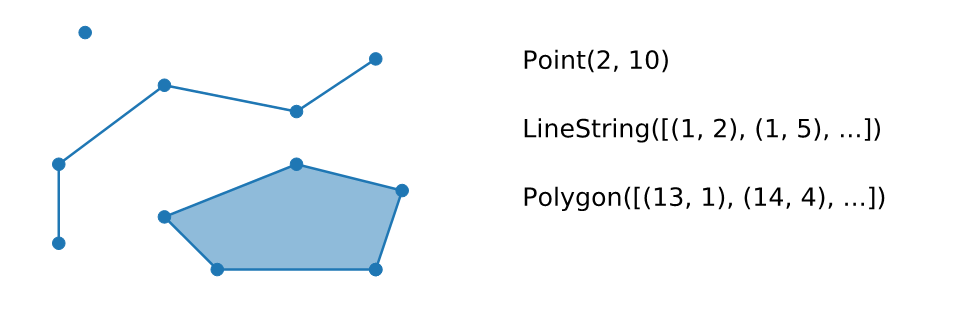
Copyright (c) 2018, Joris Van den Bossche
Zie ook: https://github.com/jorisvandenbossche/geopandas-tutorial

### Andere voorbeelden

* Uit de `cities` dataframe ook londen (Point object)
* Uit de `countries` dataframe belgie, frankrijk en vk (Polygon objects)

`.squeeze()` achter de landen is om van deze meer complexe shapely objecten alleen de geometrie over te houden, zonder metadata.

In [8]:
londen = cities.loc[219, 'geometry']
belgie = countries.loc[countries['name']=="Belgium", 'geometry'].squeeze()
nederland = countries.loc[countries['name']=="Netherlands", 'geometry'].squeeze()
vk = countries.loc[countries['name']=="United Kingdom", 'geometry'].squeeze()

# belgie is een zuiver shapely object geworden:
print(belgie)

POLYGON ((4.047071160507528 51.26725861266857, 4.973991326526914 51.47502370869813, 5.606975945670001 51.03729848896978, 6.15665815595878 50.80372101501058, 6.043073357781111 50.128051662794235, 5.782417433300907 50.09032786722122, 5.674051954784829 49.529483547557504, 4.799221632515696 49.98537303323636, 4.2860229834250845 49.907496649772554, 3.588184441755658 50.37899241800352, 3.1232515804256593 50.78036326761455, 2.658422071960274 50.796848049515745, 2.5135730322461143 51.148506171261886, 3.3149711442285366 51.345780951536085, 3.3150114849641596 51.34577662473805, 3.3149711442285366 51.34575511331991, 4.047071160507528 51.26725861266857))


Let op, als shapely object is het compleet losgetrokken van een kaart / plaats op de aarde. Het is gewoon een figuur. De coördinaten worden geïnterpreteerd als punten in een (abstract) vierkant 2D-grid.

In [9]:
type(belgie)

shapely.geometry.polygon.Polygon

Welk shapely object type is frankrijk?

In [10]:
type(vk)

shapely.geometry.multipolygon.MultiPolygon

#### Weergeven shapely objecten
De standaard weergave van een shapely object is wat het ook representeert: een geometrisch object (dus een 2D plaatje). 

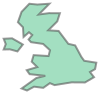

In [11]:
vk

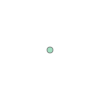

In [12]:
londen

## Beschikbare analyse tools (methods) in shapely
Shapely kan diverse geometrische berekeningen en analyses uitvoeren:

###  eenvoudige berekeningen en bewerkingen
De oppervlakte van een (Multi)Polygon:

In [13]:
belgie.area

3.8299974609075753

De afstand tussen twee Points

In [14]:
brussel.distance(londen)

4.499700136538567

Let op: deze eenheden zeggen niet veel!!

Definiëren van een LineString (verbindingslijn tussen de punten `parijs` en `brussel`)

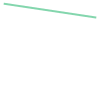

In [15]:
from shapely.geometry import LineString
lijn = LineString([londen, brussel])
lijn

### Spatiale relaties

In geospatiolae analyses is het vaak nodig te kunnen beschikken over de manier waarop geometrische objecten (gebieden, puntlocaties, lijnvormige objecte als straten en rivieren, ...) ruimtelijk met elkaar relateren. Lees meer theorie hierover hier:  https://en.wikipedia.org/wiki/Spatial_relation 

Ook hier steunt geopandas op de reeds aanwezioge analyse functionaliteit in shapely.

![](img/TopologicSpatialRelarions2.png)
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Ruimtelijke relaties tussen individuele geometrische objecten

We demonstreren één en ander eerst in een wat abstracte meetkundige wereld.
We gebruiken de data uit de countries en cities set, maar d.m.v. .squeeze() trekken we er alleen de geometries uit die daarna volledig zijn losgezongen van de crs. Die coördinaten betekenen dan 'zomaar wat' en worden als 2D-afstanden geinterpreteerd in het platte vlak.

Laten we ze visualiseren (let op: in een abstract, betekenisloos coördinatenstelsel!). Dit doen we door ze te plaatsen in een zogenaamde 'GeoSeries' om ze makkelijk samen te kunnen weergeven via de geopandas .plot() methode. We gebruiken een color map om ze goed te kunnen onderscheiden.

<AxesSubplot: >

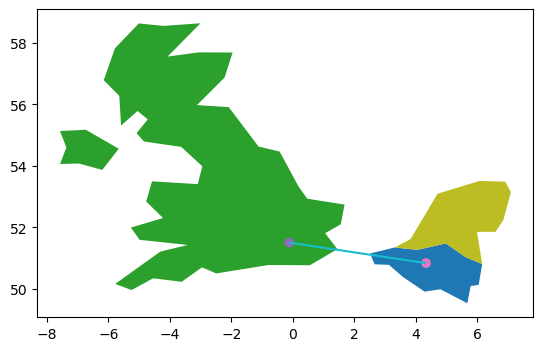

In [16]:
geopandas.GeoSeries([belgie, vk, londen, brussel, nederland, lijn]).plot(cmap='tab10')

#### demo van enkele analyses op ruimtelijke relaties
brussel in belgie?

In [17]:
brussel.within(belgie)

True

belgie bevat brussel?

In [18]:
belgie.contains(brussel)

True

belgie bevat londen?

In [19]:
belgie.contains(londen)

False

londen in belgie?

In [20]:
londen.within(belgie)

False

belgie bevat (de hele!) lijn?

In [21]:
belgie.contains(lijn)

False

lijn snijdt belgie?

In [22]:
lijn.intersects(belgie)

True

### Ruimtelijke relaties tussen elementen in geodataframes
Met behulp van de uitkomsten `TRUE` en `FALSE` van het relateren van de (shapely!) objecten in de kolom 'geometry' van geodataframes, kun je filteren op geodataframes: 

In [23]:
countries

iso_a3                  name      continent     pop_est  gdp_md_est  \
0      AFG           Afghanistan           Asia  34124811.0     64080.0   
1      AGO                Angola         Africa  29310273.0    189000.0   
2      ALB               Albania         Europe   3047987.0     33900.0   
3      ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4      ARG             Argentina  South America  44293293.0    879400.0   
..     ...                   ...            ...         ...         ...   
172    VUT               Vanuatu        Oceania    282814.0       723.0   
173    YEM                 Yemen           Asia  28036829.0     73450.0   
174    ZAF          South Africa         Africa  54841552.0    739100.0   
175    ZMB                Zambia         Africa  15972000.0     65170.0   
176    ZWE              Zimbabwe         Africa  13805084.0     28330.0   

                                              geometry  
0    POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1    MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2    POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
3    POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4    MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...  
..                                                 ...  
172  MULTIPOLYGON (((167.84488 -16.46633, 167.51518...  
173  POLYGON ((52.00001 19.00000, 52.78218 17.34974...  
174  POLYGON ((19.89577 -24.76779, 20.16573 -24.917...  
175  POLYGON ((23.21505 -17.52312, 22.56248 -16.898...  
176  POLYGON ((29.43219 -22.09131, 28.79466 -21.639...  

[177 rows x 6 columns]

In [24]:
countries.contains(londen)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

Pas nu het filter toe:

In [25]:
countries.loc[countries.contains(londen)]

iso_a3            name continent     pop_est  gdp_md_est  \
57    GBR  United Kingdom    Europe  64769452.0   2788000.0   

                                             geometry  
57  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...

Inderdaad, alleen het United Kingdom bevat (in zijn geometry!) het punt (shapely Point object) dat we eerder `londen` hebben genoemd.

Maar je kunt ook alle landen vinden waar de Amazone doorheen stroomt:

In [26]:
amazone = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [27]:
countries[countries.crosses(amazone)]  # or .intersects

iso_a3      name      continent      pop_est  gdp_md_est  \
22     BRA    Brazil  South America  207353391.0   3081000.0   
35     COL  Colombia  South America   47698524.0    688000.0   
124    PER      Peru  South America   31036656.0    410400.0   

                                              geometry  
22   POLYGON ((-57.62513 -30.21629, -56.29090 -28.8...  
35   POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  
124  POLYGON ((-69.52968 -10.95173, -68.66508 -12.5...

<div class="alert alert-info" style="font-size:120%">

Andere functie om ruimtelijke relaties te analyseren zijn:

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`


Zie ook https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships voor een overzicht.

Eventueel ook: https://en.wikipedia.org/wiki/DE-9IM .

</div>

## Spatiale operaties

Anders dan een analyse op de relaties (shapely geeft aan geopandas `TRUE` of `FALSE` terug) zijn de **operaties**, waarin je de geometrie van een object **wijzigt**.

**Binary operations:**

<table><tr>
<td> <img src="img/spatial-operations-base.png"/> </td>
<td> <img src="img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-union.png"/> </td>
<td> <img src="img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


Zie https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods voor bron afbeeldingen en meer details.  

Licentie voor gebruik: https://creativecommons.org/licenses/by/4.0/

Bijvoorbeeld: Als we eerst België (shapely object `belgie`) samen met Brussel (shapely object `brussel`) plotten zien we een polygoon en een punt: 

<AxesSubplot: >

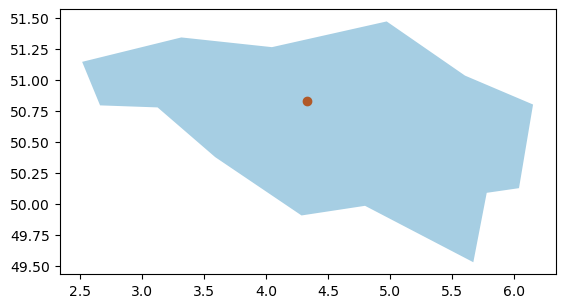

In [28]:
geopandas.GeoSeries([belgie, brussel]).plot(cmap='Paired')

 Nu creëren we een **nieuw** geometrisch (shapely) object: `brussel_met_buffer` en plotten die in plaats van `brussel`:

<AxesSubplot: >

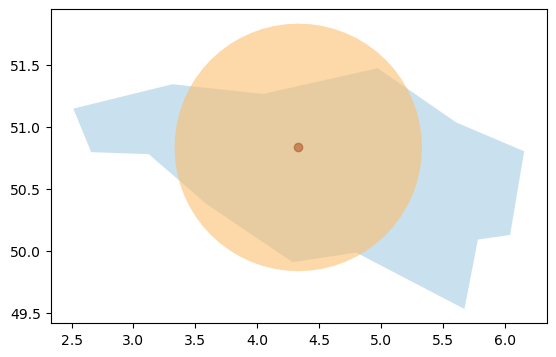

In [29]:
brussel_met_buffer = brussel.buffer(1)
geopandas.GeoSeries([belgie, brussel_met_buffer, brussel]).plot(alpha=0.6, cmap='Paired')

Het shapely objecttype van `brussel_met_buffer` is: Polygon, terwijl `brussel` een Point was!

In [30]:
type(brussel_met_buffer)

shapely.geometry.polygon.Polygon

Naast *buffer* zijj ook andere bewerkingen mogelijk, telkens met een nieuw geometrisch object als resultaat:

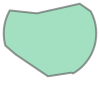

In [31]:
brussel_met_buffer.intersection(belgie)

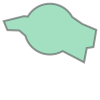

In [32]:
brussel_met_buffer.union(belgie)

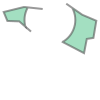

In [33]:
belgie.difference(brussel_met_buffer.intersection(belgie))

### Bewerkingen op geodaraframe
De bewerkingen voor individuele shapely-objecten kunnen ook op een complete geodataframe worden uitgevoerd. **Doorgaans moet je daarbij goed oppassen!**

In [34]:
cities.head()

name                    geometry
0  Vatican City   POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.93610)
2         Vaduz    POINT (9.51667 47.13372)
3       Lobamba  POINT (31.20000 -26.46667)
4    Luxembourg    POINT (6.13000 49.61166)

In [35]:
# Een kopie van de `cities` geodataframe - om mee te experimenteren:
cities_exp = cities.copy()
cities_exp.head()

name                    geometry
0  Vatican City   POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.93610)
2         Vaduz    POINT (9.51667 47.13372)
3       Lobamba  POINT (31.20000 -26.46667)
4    Luxembourg    POINT (6.13000 49.61166)

In [36]:
# Nu gaan we de geomety van de geodataframe wijzigen: dat is oppassen geblazen!
cities_exp['geometry'] = cities_exp.buffer(2)

C:\Users\kesjs\AppData\Local\Temp\ipykernel_24972\1401514563.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities_exp['geometry'] = cities_exp.buffer(2)


In [37]:
# Terechte waarschuwing, maar we deden het lekker toch. Na deze bewerking zijn we de data (Points) van de steden kwijt:
#cities_exp.head()
cities_exp.head()

name                                           geometry
0  Vatican City  POLYGON ((14.45339 41.90328, 14.44376 41.70725...
1    San Marino  POLYGON ((14.44177 43.93610, 14.43214 43.74006...
2         Vaduz  POLYGON ((11.51667 47.13372, 11.50704 46.93769...
3       Lobamba  POLYGON ((33.20000 -26.46667, 33.19037 -26.662...
4    Luxembourg  POLYGON ((8.13000 49.61166, 8.12037 49.41563, ...

### Samenvoegen objecten uit een geodataframe
Met het attribuut `unary_union` converteer je een hele verzameling geometrische objecten (in bijv. een GeoDataFrame) naar één enkel geometrisch object, door van alle objecten samen de `union` te nemen.

For example, we can construct a single object for the Africa continent:Another useful method is the `unary_union` attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries.

Een voorbeeld:

In [38]:
landen_afrika = countries[countries['continent'] == 'Africa']

In [39]:
afrika_totaal = landen_afrika.unary_union

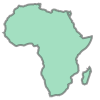

In [40]:
afrika_totaal

In [41]:
print(str(afrika_totaal)[:1000])

MULTIPOLYGON (((-11.438779466182055 6.7859168563057475, -11.70819454593574 6.860098374860726, -12.428098924193819 7.26294200279203, -12.949049038128194 7.798645738145738, -13.124025437868482 8.163946438016978, -13.246550258832515 8.903048610871508, -13.685153977909792 9.49474376061346, -14.074044969122282 9.886166897008252, -14.33007585291237 10.015719712763968, -14.579698859098258 10.214467271358515, -14.693231980843505 10.656300767454042, -14.839553798877944 10.87657156009814, -15.130311245168173 11.040411688679526, -15.664180467175527 11.458474025920795, -16.085214199273565 11.52459402103824, -16.314786749730203 11.80651479740655, -16.30894731288123 11.95870189050612, -16.61383826340328 12.170911159712702, -16.677451951554573 12.384851589401052, -16.841524624081273 13.15139394780256, -16.71372880702347 13.594958604379855, -17.126106736712615 14.373515733289224, -17.62504269049066 14.729540513564073, -17.18517289882223 14.919477240452862, -16.700706346085923 15.621527411354108, -16.4

<div class="alert alert-info" style="font-size:120%">
    
**Onthoud**:

GeoPandas (and Shapely voor individuele geometrische objecten) bieden heel veel methoden voor analyse van geospatiale data  (distance, length, centroid, boundary, convex_hull, simplify, transform, ....), veel meer dan we in dit notebook illustreren

* Een overzicht van alle methoden die GeoPandas biedt vind je hier: http://geopandas.readthedocs.io/en/latest/reference.html
</div>

In [42]:
rivers.head()

featurecla      name  \
0  Lake Centerline      Kama   
1            River      Kama   
2  Lake Centerline      Abay   
3  Lake Centerline  Al Furat   
4  Lake Centerline   Alabama   

                                            geometry  
0  LINESTRING (51.93713 55.70107, 51.88087 55.686...  
1  LINESTRING (53.69385 58.20632, 53.67715 58.273...  
2  LINESTRING (37.11301 11.85499, 37.15037 11.893...  
3  LINESTRING (38.56119 35.86264, 38.36534 35.903...  
4  MULTILINESTRING ((-86.52177 33.03212, -86.5209...

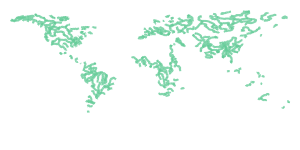

In [43]:
rivers.unary_union

In [44]:
type(rivers.unary_union)

shapely.geometry.multilinestring.MultiLineString

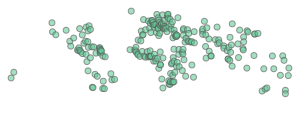

In [45]:
cities.unary_union

In [46]:
type(cities.unary_union)

shapely.geometry.multipoint.MultiPoint

# Afbeelden op een kaartlaag
## CRS
In de voorbeelden hierboven hebben we de *geometry* kolom leren kennen die cruciaal is voor geodataframes: data wordt gekoppeld aan locaties op de kaart, uitgedrukt in *coördinaten*. 

Echter: er zijn verschillende systemen om locaties op de aarde te koppelen, dit worden **coördinaat referentie systemen (CRS)** genoemd. Een ander systeem betekent een andere projectiemethode van de ellepsoide (aarde) naar een plat vlak (kaart).

Een stukje *metadata* dat altijd gekoppeld is aan een geodataframe is de info over deze CRS

In [47]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Dit heeft ook effect op de maniet waarop geopandas deze data afbeeld in de `.plot()` method:

<AxesSubplot: >

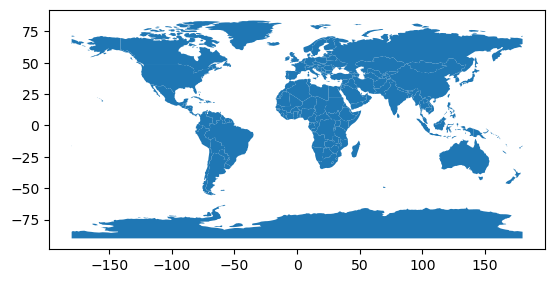

In [48]:
countries.plot()

Je kunt de crs ook aanpassen naar een andere, dan verandert ook de weergave:

<AxesSubplot: >

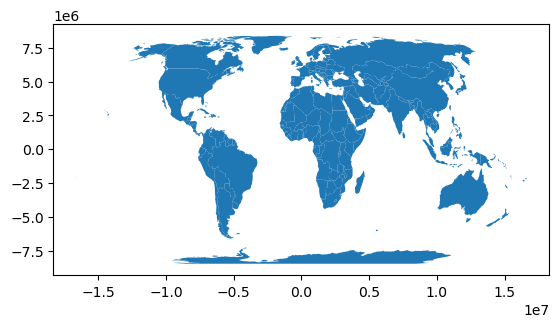

In [49]:
countries2 = countries.to_crs('ESRI:54012')
countries2.plot()

<AxesSubplot: >

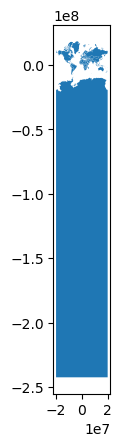

In [50]:
countries3 = countries.to_crs('EPSG:3857')
countries3.plot()

### shapely analyses op geometry in relatie met CRS
Let op: shapely is een simpel package dat gewoon meetkunde doet en de coördinaten behandelt alsof ze uit een rechthoekig carthetisch assenstelsel komen. Vertrouw daarop niet zomaar op berekeningen als *afstand* en * oppervlakte* !

Let eens op wat er met de berekening van de oppervlakte van Groenland (de eerste waarde, vér van de evenaar) gebeurt vergeleken bij die van Rwanda (op de evenaar) als we van crs = 'ESRI:54012' naar crs = 'EPSG:3857' gaan:

In [51]:
countries2.loc[countries.name.isin(["Greenland","Rwanda"]),'geometry'].area/1000000

65     2.194863e+06
136    2.352168e+04
dtype: float64

In [52]:
countries3.loc[countries.name.isin(["Greenland","Rwanda"]),'geometry'].area/1000000

65     3.628550e+07
136    2.355254e+04
dtype: float64

In werkelijkheid: Oppervlakte van Groenland is 2.166.000 km^2 en van Rwanda is 26.338 km^2

## Koppelen aan folium kaart
Meestal wil je bij het afbeelden van geospatiale data uit een geodataframe niet alleen de objecten uit de dataset, maar ook elementen van de geagrafische omgeving afgebeeld hebben. Folium is een Python library waarmee handig *Leaflet* kaarten gemaakt kunnen worden in geopandas, dat gebruiken we hiervoor. 

Als je nu de method `.explore()` aanroept bij je geodataframe dan wordt eigenlijk al een mooie kaart toegevoegd, lees [hier](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) hier meer over deze methode.

### Voorbeelden wereldkaart

In [53]:
import folium
import matplotlib.pyplot as plt
import mapclassify
cities.explore()

In [54]:
countries.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

In [55]:
countries.explore()

Deze methode is robuust m.b.t. de crs van de dataset. Tevens mooie optie: `column = ...`: een numerieke variabele uit het geodataframe die de kleurenschaal vult. `gdp_md_est` is het (totale) bruto binnelands product....wat zou meer informatie weergeven?

In [56]:
countries3.explore(column = 'gdp_md_est')

### Voorbeeld met data van Gemeente Amsterdam

Ga eens naar [deze pagina](https://maps.amsterdam.nl/open_geodata) en kies:

* Verkeer & Infrastructuur -> Onderhoud wegen -> Download: .json (GeoJSON LngLat) > 

In [57]:
url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=UP_WEGEN&THEMA=onderhoud_wegen"
straten = geopandas.read_file(url)
straten.head()

UP_ID                        Projectnaam  \
0  UP1469                     Aetsveld Noord   
1  UP1569  Soembawastraat-Kramatweg kruising   
2  UP1559                  Keulsevaartstraat   
3  UP1558                          Aquamarin   
4  UP1560                       De Aker-Oost   

                                 Projectomschrijving  \
0  kleinschalig groot onderhoud: herstellen schad...   
1  Verlagen van de verkeersdrempel (drempeltafel)...   
2  Gedeeltelijk herstraten e/o herstellen schades...   
3  geheel of gedeeltelijk herstraten elementenver...   
4          30% herstraten voetpaden en parkeervakken   

                Projectsoort  Start_voorbereiding  Start_uitvoering  \
0  Planmatig klein onderhoud                    0              2023   
1  Planmatig klein onderhoud                    0              2024   
2  Planmatig klein onderhoud                    0              2024   
3  Planmatig klein onderhoud                    0              2024   
4  Planmatig klein onderhoud                    0              2024   

   Einde_uitvoering                                 Gebied  \
0                 0                        Weesp, Driemond   
1                 0  Indische Buurt, Oostelijk Havengebied   
2                 0                        Weesp, Driemond   
3                 0                        Weesp, Driemond   
4                 0          De Aker, Sloten, Nieuw-Sloten   

                                            geometry  
0  POLYGON ((5.03713 52.30199, 5.03709 52.30213, ...  
1  POLYGON ((4.94485 52.36550, 4.94455 52.36555, ...  
2  POLYGON ((5.02775 52.31012, 5.02780 52.30839, ...  
3  POLYGON ((5.02266 52.31023, 5.02267 52.31017, ...  
4  POLYGON ((4.78805 52.35228, 4.78220 52.34686, ...

<AxesSubplot: >

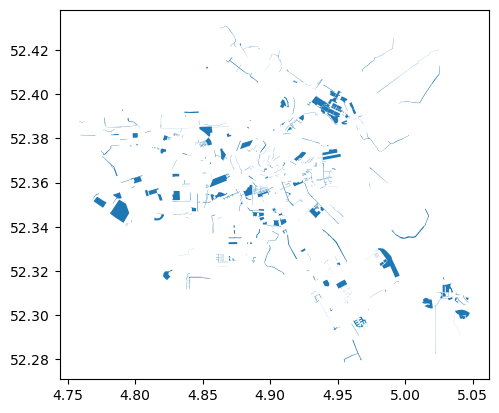

In [58]:
straten.plot()

In [59]:
straten.explore(column = 'Start_voorbereiding')

# Spatial join operation op geodataframes
Met een spatial join voer je een bewerking uit op de geodataframes: **de output is weer een geodataframe**.
We gebruiken `geopandas.sjoin()`

<div class="alert alert-info" style="font-size:120%">
    
**SPATIAL JOIN** = *transferring attributes from one layer to another based on their spatial relationship* <br>


Different parts of this operations:

* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
* The type of join: left or inner join


![](img/illustration-spatial-join.svg)  

    
Copyright (c) 2018, Joris Van den Bossche  
Zie ook: https://github.com/jorisvandenbossche/geopandas-tutorial

</div>

In [60]:
print(countries[['name','geometry']].head())
print("Aantal rijen countries :", len(countries))
print(cities.head())
print("Aantal rijen cities :", len(cities))

                   name                                           geometry
0           Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1                Angola  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2               Albania  POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3  United Arab Emirates  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4             Argentina  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
Aantal rijen countries : 177
           name                    geometry
0  Vatican City   POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.93610)
2         Vaduz    POINT (9.51667 47.13372)
3       Lobamba  POINT (31.20000 -26.46667)
4    Luxembourg    POINT (6.13000 49.61166)
Aantal rijen cities : 243


In [61]:
joined = geopandas.sjoin(cities, countries, predicate='within', how ='left')
joined.head()

name_left                    geometry  index_right iso_a3  name_right  \
0  Vatican City   POINT (12.45339 41.90328)         79.0    ITA       Italy   
1    San Marino   POINT (12.44177 43.93610)         79.0    ITA       Italy   
2         Vaduz    POINT (9.51667 47.13372)          9.0    AUT     Austria   
3       Lobamba  POINT (31.20000 -26.46667)        152.0    SWZ   Swaziland   
4    Luxembourg    POINT (6.13000 49.61166)         97.0    LUX  Luxembourg   

  continent     pop_est  gdp_md_est  
0    Europe  62137802.0   2221000.0  
1    Europe  62137802.0   2221000.0  
2    Europe   8754413.0    416600.0  
3    Africa   1467152.0     11060.0  
4    Europe    594130.0     58740.0

Blijkbaar heeft elke stand een bijbehorend land in de dataset:

In [62]:
print("Aantal rijen joined :", len(joined))

Aantal rijen joined : 243


In [63]:
joined2 = geopandas.sjoin(countries, cities, predicate='contains', how ='left')
joined2.head()

iso_a3             name_left continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan      Asia  34124811.0     64080.0   
1    AGO                Angola    Africa  29310273.0    189000.0   
2    ALB               Albania    Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates      Asia   6072475.0    667200.0   
3    ARE  United Arab Emirates      Asia   6072475.0    667200.0   

                                            geometry  index_right name_right  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...        211.0      Kabul  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...        172.0     Luanda  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...        118.0     Tirana  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...         48.0  Abu Dhabi  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...        183.0      Dubai

Niet elk land is gevuld met een stad (uit de dataset):

In [64]:
print("Aantal rijen joined2 :", len(joined2))

Aantal rijen joined2 : 226


# De overlay operation op geometrische objecten uit een geodataframe

Bij een spatial join combineer je geodata o.b.v. de geometry kolommen. Je *wijzigt* de geometry *niet*. De **overlay** bewerking doet dat wel, je eindigt dan met een geodataframe waarin de geometry is bewerkt t.o.v. de originele data. 

![](img/overlay.png)  

Copyright (c) 2018, Joris Van den Bossche  
Zie ook: https://github.com/jorisvandenbossche/geopandas-tutorial

## Voorbeelden
We werken een voorbeeld uit m.b.v. de gebufferde `cities` die we eerder als `cities_exp` hebben gedefinieerd en een continent: afrika

<AxesSubplot: >

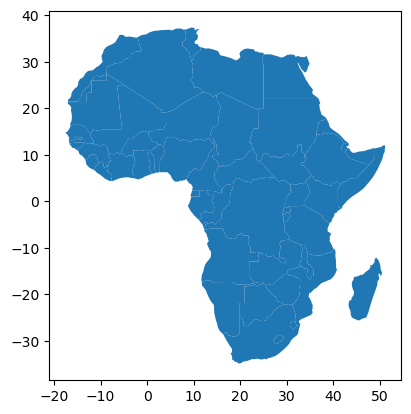

In [65]:
afrika = countries[countries['continent'] == 'Africa']
afrika.plot()

Bekijk de eerste waarden van de polygoon `Egypt` eens (originele waarden):

In [66]:
afrika.loc[afrika["name"] == "Egypt"]

iso_a3   name continent     pop_est  gdp_md_est  \
47    EGY  Egypt    Africa  97041072.0   1105000.0   

                                             geometry  
47  POLYGON ((36.86623 22.00000, 32.90000 22.00000...

We kijken naar het verschil (dat is *niet* symetrisch!) tussen `afrika` en `cities_exp`:

<AxesSubplot: >

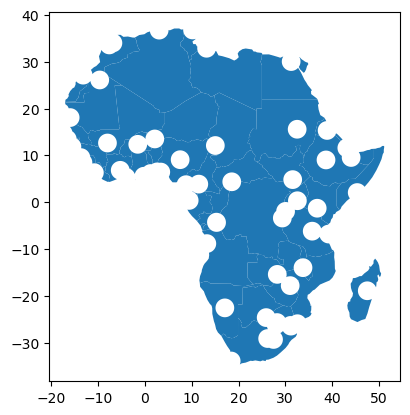

In [67]:
afrika_diff = geopandas.overlay(afrika, cities_exp, how='difference')
afrika_diff.plot()

Bekijk opnieuw de eerste waarden van de polygoon `Egypt` (bewerkte waarden):

In [68]:
afrika_diff.loc[afrika_diff["name"] == "Egypt"]

iso_a3   name continent     pop_est  gdp_md_est  \
10    EGY  Egypt    Africa  97041072.0   1105000.0   

                                             geometry  
10  MULTIPOLYGON (((25.00000 25.68250, 25.00000 29...

### meer voorbeelden:

<AxesSubplot: >

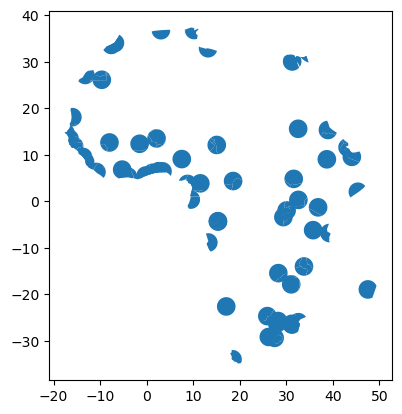

In [69]:
geopandas.overlay(afrika, cities_exp, how='intersection').plot()

C:\Users\kesjs\AppData\Local\Temp\ipykernel_24972\1223608614.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geopandas.overlay(afrika, cities_exp, how='union').plot()


<AxesSubplot: >

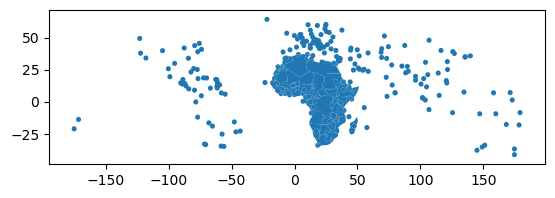

In [70]:
geopandas.overlay(afrika, cities_exp, how='union').plot()

C:\Users\kesjs\AppData\Local\Temp\ipykernel_24972\1842492864.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  geopandas.overlay(afrika, cities_exp, how='symmetric_difference').plot()


<AxesSubplot: >

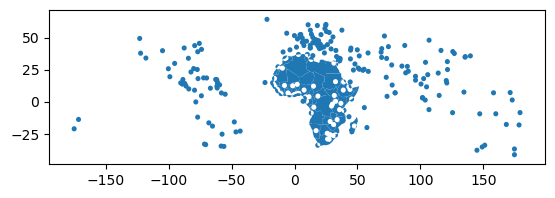

In [71]:
geopandas.overlay(afrika, cities_exp, how='symmetric_difference').plot()

## De crs van groot belang
Zowel bij spatiale joins als bij de overlay bewerking dienen de datasets **in hun geometry in dezelfde crs gedefinieerd te zijn!**

In [72]:
countries2.crs

<Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
cities_exp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
joined3 = geopandas.sjoin(cities, countries2, predicate='within', how ='left')

C:\Users\kesjs\AppData\Local\Temp\ipykernel_24972\1499746574.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: ESRI:54012

  joined3 = geopandas.sjoin(cities, countries2, predicate='within', how ='left')


In [75]:
#cities.to_crs('ESRI:54012')
joined3 = geopandas.sjoin(cities.to_crs('ESRI:54012'), countries2, predicate='within', how ='left')

In [76]:
joined3.head()

name_left                          geometry  index_right iso_a3  \
0  Vatican City   POINT (1045953.376 5221055.573)         79.0    ITA   
1    San Marino   POINT (1032581.802 5441978.381)         79.0    ITA   
2         Vaduz    POINT (773987.675 5779700.627)          9.0    AUT   
3       Lobamba  POINT (2808344.276 -3413607.492)        152.0    SWZ   
4    Luxembourg    POINT (490151.271 6032586.928)         97.0    LUX   

   name_right continent     pop_est  gdp_md_est  
0       Italy    Europe  62137802.0   2221000.0  
1       Italy    Europe  62137802.0   2221000.0  
2     Austria    Europe   8754413.0    416600.0  
3   Swaziland    Africa   1467152.0     11060.0  
4  Luxembourg    Europe    594130.0     58740.0

C:\Users\kesjs\AppData\Local\Temp\ipykernel_24972\1891220145.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: ESRI:54012
Right CRS: EPSG:4326

  geopandas.overlay(countries2, cities_exp, how='difference').plot()


<AxesSubplot: >

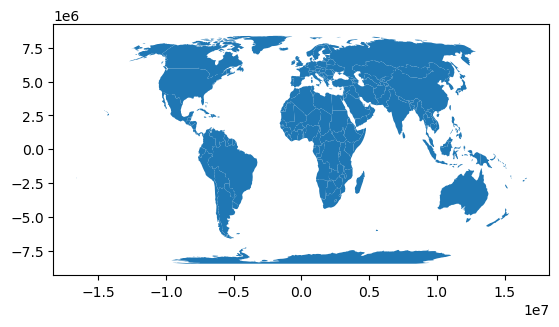

In [77]:
geopandas.overlay(countries2, cities_exp, how='difference').plot()

<AxesSubplot: >

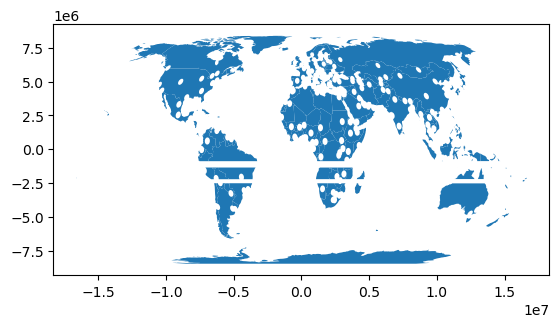

In [78]:
#cities_exp.to_crs('ESRI:54012')
geopandas.overlay(countries2, cities_exp.to_crs('ESRI:54012'), how='difference').plot()